# Mini-Project AI/ML
### DATASET : Startup Funding in India
**Submitted by:** Nikita Yadav  
**Topic Area:** Finance Analysis  

### 🎯 Project Focus: Startup Funding in India

The focus of this project is to perform Exploratory Data Analysis (EDA) on Indian startup funding data to uncover trends, patterns, and insights in the startup ecosystem. The goal is to understand:
Which sectors (like E-commerce, FinTech, Edu-Tech) attract the most investment
Which cities are leading in startup activity (e.g., Bengaluru, Mumbai)
How funding trends have evolved over time
Typical investment sizes, outliers, and frequency
Investor behavior and types of funding rounds 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("starup.csv")
df

,Unnamed: 0,Date,Startup,Industry,Location,Investor,Type,Amount
0,0,01-04-2021,BYJU'S,Edu-tech,Bengaluru,Innoven Capital,Series F,"46,00,00,000"
1,1,05-04-2021,Meesho,E-commerce,Bengaluru,SoftBank Vision Fund 2,Series E,"30,00,00,000"
2,2,14-04-2021,Swiggy,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,"34,30,00,000"
3,3,07-04-2021,Groww,FinTech,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,"8,30,00,000"
4,4,14-04-2021,Beldara,E-commerce,Mumbai,Hindustan Media Ventures,Venture,"74,00,000"
...,...,...,...,...,...,...,...,...
611,611,26-07-2018,TheCapitalNet,Fin-Tech,Hyderabad,Lindwall Family Investments LLC (LFI),Private Equity,"5,00,000"
612,612,30-07-2018,Shuttl,Consumer Internet,Gurugram,Amazon Alexa Fund & Dentsu Ventures,Private Equity,"1,10,00,000"
613,613,30-07-2018,Cure Fit,Consumer Internet,Bengaluru,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,"12,00,00,000"
614,614,31-07-2018,Five Star Group,Fin-Tech,Chennai,"TPG, Norwest Venture Partners, Sequoia Capital...",Private Equity,"10,00,00,000"


In [3]:
#info
print(df.head())

   Unnamed: 0        Date  Startup              Industry   Location  \
0           0  01-04-2021   BYJU'S              Edu-tech  Bengaluru   
1           1  05-04-2021   Meesho            E-commerce  Bengaluru   
2           2  14-04-2021   Swiggy  Online Food Delivery  Bengaluru   
3           3  07-04-2021    Groww               FinTech  Bengaluru   
4           4  14-04-2021  Beldara            E-commerce     Mumbai   

                                            Investor      Type        Amount  
0                                    Innoven Capital  Series F  46,00,00,000  
1                             SoftBank Vision Fund 2  Series E  30,00,00,000  
2  Amansa Holdings, Carmignac, Falcon Edge Capita...  Series J  34,30,00,000  
3         MC Global Edtech, B Capital, Baron, others  Series D   8,30,00,000  
4                           Hindustan Media Ventures   Venture     74,00,000  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  616 non-null    int64 
 1   Date        611 non-null    object
 2   Startup     611 non-null    object
 3   Industry    611 non-null    object
 4   Location    611 non-null    object
 5   Investor    581 non-null    object
 6   Type        604 non-null    object
 7   Amount      559 non-null    object
dtypes: int64(1), object(7)
memory usage: 38.6+ KB
None


In [5]:
print(df.describe())

       Unnamed: 0
count  616.000000
mean   307.500000
std    177.968162
min      0.000000
25%    153.750000
50%    307.500000
75%    461.250000
max    615.000000


In [6]:
#null values
print(df.isnull().sum())

Unnamed: 0     0
Date           5
Startup        5
Industry       5
Location       5
Investor      35
Type          12
Amount        57
dtype: int64


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Startup', 'Industry', 'Location', 'Investor',
       'Type', 'Amount'],
      dtype='object')


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['unnamed:_0', 'date', 'startup', 'industry', 'location', 'investor',
       'type', 'amount'],
      dtype='object')

In [10]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] #fixing col..

0     2021-01-04
1     2021-05-04
2     2021-04-14
3     2021-07-04
4     2021-04-14
         ...    
611   2018-07-26
612   2018-07-30
613   2018-07-30
614   2018-07-31
615   2018-07-31
Name: date, Length: 616, dtype: datetime64[ns]

In [13]:
df['startup'] = df['startup'].str.strip().str.title()
df['startup']

0               Byju'S
1               Meesho
2               Swiggy
3                Groww
4              Beldara
            ...       
611      Thecapitalnet
612             Shuttl
613           Cure Fit
614    Five Star Group
615        Healthsignz
Name: startup, Length: 616, dtype: object

In [15]:
print(df.columns.tolist())

['unnamed:_0', 'date', 'startup', 'industry', 'location', 'investor', 'type', 'amount']


In [18]:
df['amount'] = df['amount'].astype(str)
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].where(~df['amount'].str.lower().str.contains("undisclosed"), np.nan)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['amount']

0      460000000.0
1      300000000.0
2      343000000.0
3       83000000.0
4        7400000.0
          ...     
611       500000.0
612     11000000.0
613    120000000.0
614    100000000.0
615      5000000.0
Name: amount, Length: 616, dtype: float64

In [19]:
df.dropna(subset=['startup', 'amount', 'date'], inplace=True)

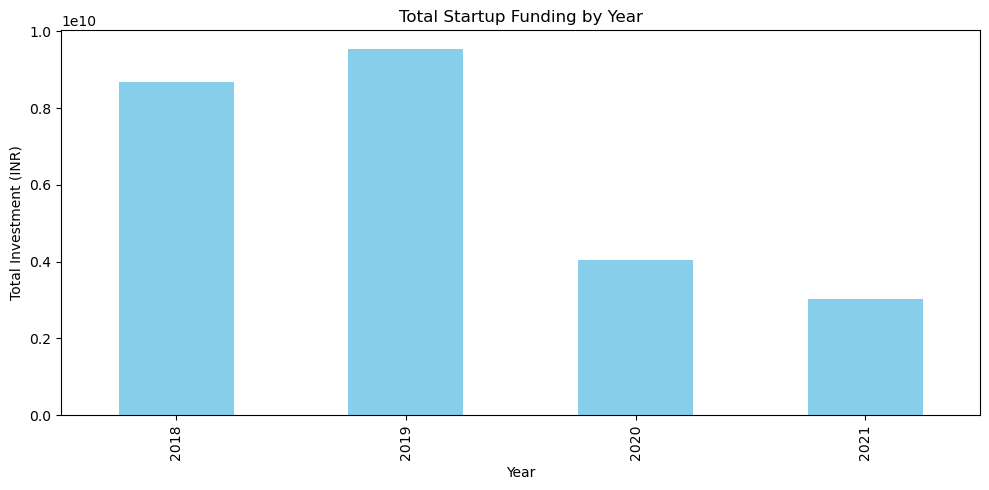

In [22]:
# Total funding by year
plt.figure(figsize=(10,5))
df.groupby(df['date'].dt.year)['amount'].sum().plot(kind='bar', color='skyblue') #groupby(df['date'].dt.year) time series
plt.title("Total Startup Funding by Year")
plt.ylabel("Total Investment (INR)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

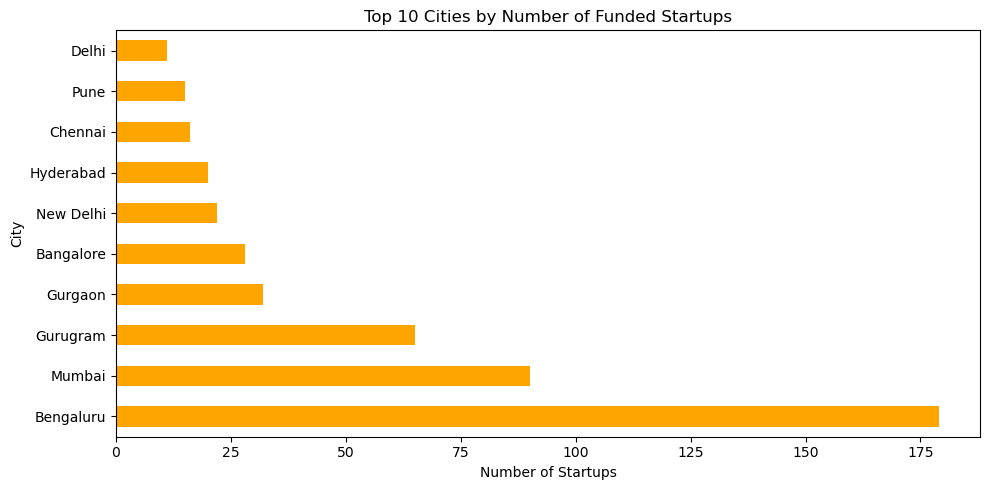

In [25]:
plt.figure(figsize=(10,5))
df['location'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Cities by Number of Funded Startups")
plt.xlabel("Number of Startups")
plt.ylabel("City")
plt.tight_layout()
plt.show() #10 top funded

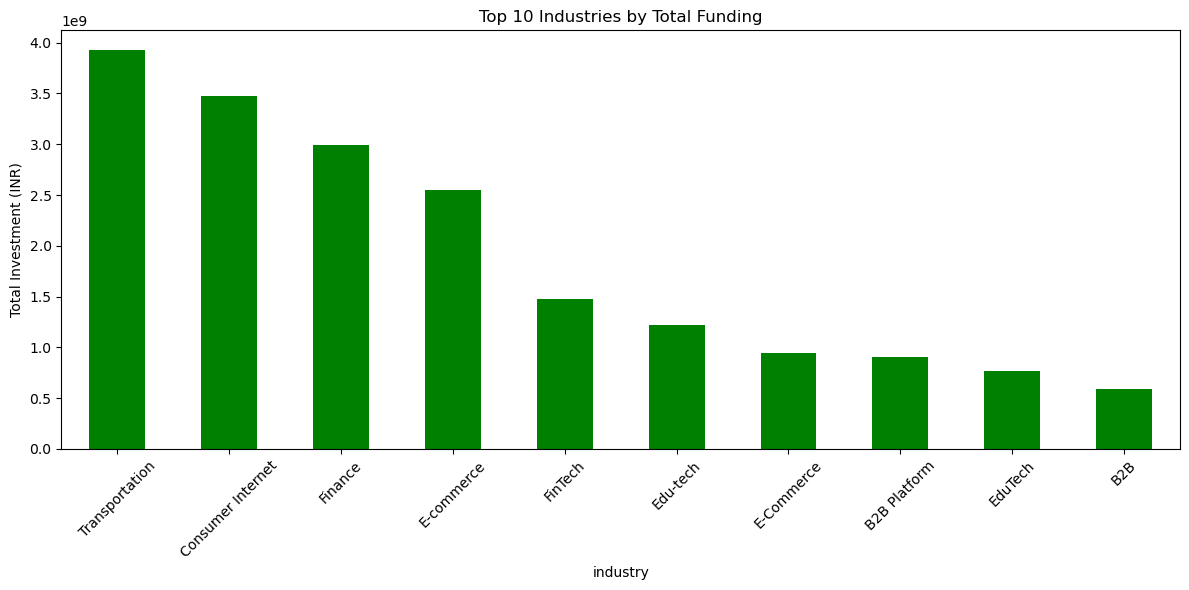

In [27]:
plt.figure(figsize=(12,6))
df.groupby('industry')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Top 10 Industries by Total Funding")
plt.ylabel("Total Investment (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # 10 top industry

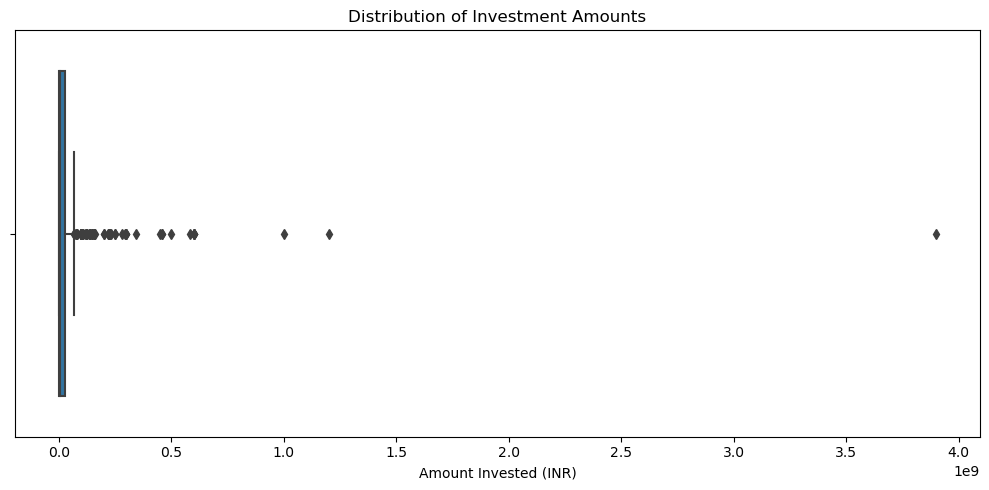

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['amount']) #Outlier & Anomaly Detection
plt.title("Distribution of Investment Amounts")
plt.xlabel("Amount Invested (INR)")
plt.tight_layout()
plt.show() #investment distribute

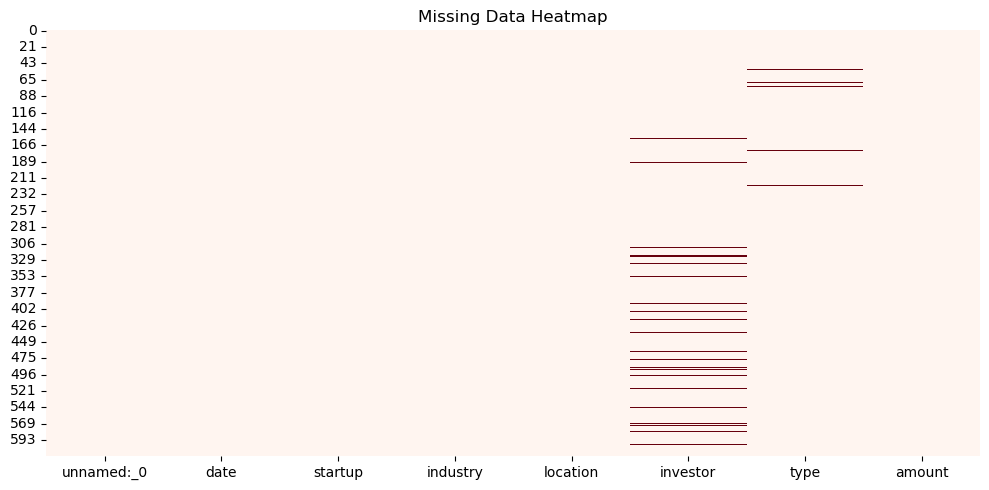

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.tight_layout()
plt.show() #missing data

#### 📌 Conclusion  

The Exploratory Data Analysis on the Startup Funding in India dataset revealed insightful trends in the Indian startup ecosystem. We observed a steady increase in funding over the years, with major contributions from cities like Bengaluru and Mumbai. Key industries such as E-commerce, FinTech, and Edu-Tech received the highest investments. After cleaning and analyzing the data, we also identified funding outliers and missing values, ensuring the dataset's reliability. Overall, the project successfully applied core EDA techniques and highlighted the investment dynamics in Indian startups.